# Running for the First Time

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

# Necessary Imports and Settings

In [4]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

import os
import nltk
import pandas as pd
import torch
import numpy as np
from jinja2 import Template
import xmltodict
import pickle

from fuzzywuzzy import fuzz
#import Levenshtein as lev
#from rouge import Rouge

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
stop_words = set(stopwords.words("english"))

In [6]:
path_andersen = "/kuacc/users/bozyurt20/ChildrenStories/Andersen"
path_fanny = "/kuacc/users/bozyurt20/ChildrenStories/Fanny Fern"
path_annotations = "/kuacc/users/bozyurt20/ChildrenStories/Annotations"

dir_list_andersen = os.listdir(path_andersen)
dir_list_fanny = os.listdir(path_fanny)
dir_list_annotations = os.listdir(path_annotations)

FileNotFoundError: [Errno 2] No such file or directory: '/kuacc/users/bozyurt20/ChildrenStories/Andersen'

In [2]:
%conda env list

# conda environments:
#
base                     /kuacc/apps/anaconda/5.2.0
RBERT                    /kuacc/users/bozyurt20/.conda/envs/RBERT
ace                      /kuacc/users/bozyurt20/.conda/envs/ace
booknlp                  /kuacc/users/bozyurt20/.conda/envs/booknlp
hf                    *  /kuacc/users/bozyurt20/.conda/envs/hf


Note: you may need to restart the kernel to use updated packages.


In [ ]:
model

# Preparing the Models

In [7]:
tokenizer = AutoTokenizer.from_pretrained("bigscience/T0pp")

In [10]:
path = "/kuacc/users/bozyurt20/hpc_run/105_persuasion.txt"

with open(path, "r") as f:
    book = f.read()
    
indices = []
for i in range(1, 100):
    chapter_header = "Chapter " + str(i) + "\n\n"
    indices.append(book.find(chapter_header))

ind1 = indices[0]
ind2 = indices[1]
i = 2
chapters = []
while ind2 != -1:
    chapters.append(book[ind1:ind2])
    ind1 = ind2
    ind2 = indices[i]
    i += 1   
    
chapter1 = chapters[0]
paragraph_start_ind = chapters[1].find("Mr Shepherd")
chapter2 = chapters[1][paragraph_start_ind:]
    

In [11]:
len(tokenizer.encode(chapter2))

Token indices sequence length is longer than the specified maximum sequence length for this model (2574 > 512). Running this sequence through the model will result in indexing errors


2574

In [5]:
model = AutoModelForSeq2SeqLM.from_pretrained("bigscience/T0pp")

In [6]:
# If you have multiple GPU's, use this:
model.parallelize()

In [ ]:
# If you are using a single GPU, use the following to do parameter offloading:

# TODO

In [29]:
from numba import cuda
cuda.select_device(0)
cuda.close()

# Example Pipeline

In [7]:
my_str = """What is the answer?
Context: , and sent to her. The Emperor had them brought into a large hall, where the Princess was playing at “Visiting,” with the ladies of the court; and when she saw the caskets with the presents, she clapped her hands for joy. “Ah, if it were but a little pussy-cat!” said she; but the rose tree, with its beautiful rose came to view. “Oh, how prettily it is made!” said all the court ladies. “It is more than pretty,” said the Emperor, “it is charming!” But the Princess touched it, and was almost ready to cry. “Fie, papa!” said she. “It is not made at all, it is natural!” “Let us see what is in the other casket, before we get into a bad humor,” said the Emperor. So the nightingale came forth and sang so delightfully that at first no one could say anything ill-humored of her. “Superbe! Charmant!” exclaimed the ladies; for they all used to chatter French, each one worse than her neighbor. “How much the bird reminds me of the musical box that belonged to our blessed Empress,” said an old knight. “Oh yes! These are the same tones, the same execution.” “Yes! yes!” said the Emperor, and he wept like a child at the remembrance. “I will still hope that it is not a real bird,” said the Princess. “Yes, it is a real bird,” said those who had brought it. “Well then let the bird fly,” said the Princess; and she positively refused to see the Prince. However, he was not to be discouraged; he daubed his face over brown and black; pulled his cap over his ears, and knocked at the door. “Good day to my lord, the Emperor!” said he. “Can I have employment at the palace?” “Why, yes,” said the Emperor. “I want some one to take care of the pigs, for we have a great many of them.” So the Prince was appointed “Imperial Swineherd.” He had a dirty little room close by the pigsty; and there he sat the whole day, and worked. By the evening he had made a pretty little kitchen-pot. Little bells were hung all round it; and when the pot was boiling, these bells tinkled in the most charming manner, and played the old melody, “Ach! du lieber Augustin, Alles ist weg, weg, weg!”* * “Ah! dear Augustine! All is gone, gone, gone!” But what was still more curious, whoever held his finger in the smoke of the kitchen-pot, immediately smelt all the dishes that were cooking on every hearth in the city--this, you see, was something quite different from the rose. Now the Princess happened to walk that way; and when she heard the tune, she stood quite still, and seemed pleased; for she could play “Lieber Augustine”; it was the only piece she knew; and she played it with one finger. “Why there is my piece,” said the Princess. “That swineherd must certainly have been well educated! Go in and ask him the price of the instrument.” So one of the court-ladies must run in; however, she drew on wooden slippers first. “What will you take for the kitchen-pot?” said the lady. “I will have ten kisses from the Princess,” said the swineherd. “Yes, indeed!” said the lady. “I cannot sell it for less,” rejoined the swineherd. “He is an impudent fellow!” said the Princess, and she walked on; but when she had gone a little way, the bells tinkled so prettily “Ach! du lieber Augustin, Alles ist weg, weg, weg!” “Stay,” said the Princess. “Ask him if he will have ten kisses from the ladies of my court.” “No, thank you!” said the swineherd. “Ten kisses from the Princess, or I keep the kitchen-pot myself.” “That must not be, either!” said the Princess. “But do you all stand before me that no one may see us.” And the court-ladies placed themselves in front of her, ;
Question: Where are the court-ladies?;,
Answer: is not known haha. Told you. I rock.
What is the answer?
Context: , and sent to her. The Emperor had them brought into a large hall, where the Princess was playing at “Visiting,” with the ladies of the court; and when she saw the caskets with the presents, she clapped her hands for joy. “Ah, if it were but a little pussy-cat!” said she; but the rose tree, with its beautiful rose came to view. “Oh, how prettily it is made!” said all the court ladies. “It is more than pretty,” said the Emperor, “it is charming!” But the Princess touched it, and was almost ready to cry. “Fie, papa!” said she. “It is not made at all, it is natural!” “Let us see what is in the other casket, before we get into a bad humor,” said the Emperor. So the nightingale came forth and sang so delightfully that at first no one could say anything ill-humored of her. “Superbe! Charmant!” exclaimed the ladies; for they all used to chatter French, each one worse than her neighbor. “How much the bird reminds me of the musical box that belonged to our blessed Empress,” said an old knight. “Oh yes! These are the same tones, the same execution.” “Yes! yes!” said the Emperor, and he wept like a child at the remembrance. “I will still hope that it is not a real bird,” said the Princess. “Yes, it is a real bird,” said those who had brought it. “Well then let the bird fly,” said the Princess; and she positively refused to see the Prince. However, he was not to be discouraged; he daubed his face over brown and black; pulled his cap over his ears, and knocked at the door. “Good day to my lord, the Emperor!” said he. “Can I have employment at the palace?” “Why, yes,” said the Emperor. “I want some one to take care of the pigs, for we have a great many of them.” So the Prince was appointed “Imperial Swineherd.” He had a dirty little room close by the pigsty; and there he sat the whole day, and worked. By the evening he had made a pretty little kitchen-pot. Little bells were hung all round it; and when the pot was boiling, these bells tinkled in the most charming manner, and played the old melody, “Ach! du lieber Augustin, Alles ist weg, weg, weg!”* * “Ah! dear Augustine! All is gone, gone, gone!” But what was still more curious, whoever held his finger in the smoke of the kitchen-pot, immediately smelt all the dishes that were cooking on every hearth in the city--this, you see, was something quite different from the rose. Now the Princess happened to walk that way; and when she heard the tune, she stood quite still, and seemed pleased; for she could play “Lieber Augustine”; it was the only piece she knew; and she played it with one finger. “Why there is my piece,” said the Princess. “That swineherd must certainly have been well educated! Go in and ask him the price of the instrument.” So one of the court-ladies must run in; however, she drew on wooden slippers first. “What will you take for the kitchen-pot?” said the lady. “I will have ten kisses from the Princess,” said the swineherd. “Yes, indeed!” said the lady. “I cannot sell it for less,” rejoined the swineherd. “He is an impudent fellow!” said the Princess, and she walked on; but when she had gone a little way, the bells tinkled so prettily “Ach! du lieber Augustin, Alles ist weg, weg, weg!” “Stay,” said the Princess. “Ask him if he will have ten kisses from the ladies of my court.” “No, thank you!” said the swineherd. “Ten kisses from the Princess, or I keep the kitchen-pot myself.” “That must not be, either!” said the Princess. “But do you all stand before me that no one may see us.” And the court-ladies placed themselves in front of her, ;
Question: Where are the court-ladies?;
Answer: is not known haha. Told you. I rock."""


In [8]:
inputs = tokenizer.encode(my_str, return_tensors="pt")

Token indices sequence length is longer than the specified maximum sequence length for this model (2074 > 512). Running this sequence through the model will result in indexing errors


In [21]:
len(inputs[0])

2074

In [22]:
inputs = inputs.to("cuda:0")

with torch.no_grad():
    outputs = model.generate(inputs)   

out = tokenizer.decode(outputs[0], skip_special_tokens=True)

In [23]:
out

'The Emperor had them brought into a large hall, where the Princess was playing at “Visiting'

# Creating Prompts

## 1. Context Already Finalized Before

In [7]:
def create_prompt_strict(version, context, character, grammatical_number):
    
    if grammatical_number == 'singular':
        to_be = 'is'
    elif grammatical_number == 'plural':
        to_be = 'are'
    
    if version in [1, 2, 9, 10, 11, 12, 13, 20, 21, 22]:
        question = "Where " + to_be + " " + character + "?"
    elif version in [4, 5, 7, 8, 15, 16, 18, 19]:
        question = "where " + character + " " + to_be + "."
    elif version in [3, 14]:
        question = "where " + character + " " + to_be + "?"
    elif version in [6, 17]:
        question = "where " + to_be + " " + character + "?"
        
    if version == 1 or version == 12:
        intro = "Answer the question depending on the context."
    elif version == 2 or version == 13:
        intro = "What is the answer?"
    elif version == 3 or version == 14:
        intro = "Can you tell me "
    elif version == 4 or version == 15:
        intro = "Please tell me "
    elif version == 5 or version == 16:
        intro = "Tell me "
    elif version == 6 or version == 17:
        intro = "From the passage, "
    elif version == 7 or version == 18:
        intro = "I want to know "
    elif version == 8 or version == 19:
        intro = "I want to ask "
    elif version == 9 or version == 20:
        intro = "What is the answer to: "
    elif version == 10 or version == 21:
        intro = "Find the answer to: "
    elif version == 11 or version == 22:
        intro = "Answer: "     
        
    if version in [1, 2]:
        tm = Template("""{{ intro }}
Context: {{context}};
Question: {{question}};
Answer: """)
        prompt = tm.render(intro=intro, context=context, question=question)
    elif version in [3, 4, 5, 6, 7, 8, 9, 10, 11]:
        tm = Template("{{context}} {{intro}}{{question}}")
        prompt = tm.render(intro=intro, context=context, question=question)
    elif version in [12, 13]:
        tm = Template("""{{ intro }}
Context: {{context}};
Question: {{question}};
If you can't find the answer, please respond "unanswerable".
Answer: """)
        prompt = tm.render(intro=intro, context=context, question=question)
    elif version in [14, 15, 16, 17, 18, 19, 20, 21, 22]:
        tm = Template('{{context}} {{intro}}{{question}} If you can\'t find the answer, please respond "unanswerable"."')
        prompt = tm.render(intro=intro, context=context, question=question)
    elif version == 23:
        prompt = "Where " + to_be + " " + character + " in the following text: " + context + " Answer: "         
        
    return prompt

## 2. Context Has To Be Clipped First

In [8]:
def create_prompt_clipped(version, context, character, grammatical_number, max_no_tokens=1024):
    
    if grammatical_number == 'singular':
        to_be = 'is'
    elif grammatical_number == 'plural':
        to_be = 'are'
    
    if version in [1, 2, 9, 10, 11, 12, 13, 20, 21, 22]:
        question = "Where " + to_be + " " + character + "?"
    elif version in [4, 5, 7, 8, 15, 16, 18, 19]:
        question = "where " + character + " " + to_be + "."
    elif version in [3, 14]:
        question = "where " + character + " " + to_be + "?"
    elif version in [6, 17]:
        question = "where " + to_be + " " + character + "?"
        
    if version == 1 or version == 12:
        intro = "Answer the question depending on the context."
    elif version == 2 or version == 13:
        intro = "What is the answer?"
    elif version == 3 or version == 14:
        intro = "Can you tell me "
    elif version == 4 or version == 15:
        intro = "Please tell me "
    elif version == 5 or version == 16:
        intro = "Tell me "
    elif version == 6 or version == 17:
        intro = "From the passage, "
    elif version == 7 or version == 18:
        intro = "I want to know "
    elif version == 8 or version == 19:
        intro = "I want to ask "
    elif version == 9 or version == 20:
        intro = "What is the answer to: "
    elif version == 10 or version == 21:
        intro = "Find the answer to: "
    elif version == 11 or version == 22:
        intro = "Answer: "     
    
    if version in [1, 2]:
        oo = 0
        tm = Template("""{{ intro }}
Context: {{context}};
Question: {{question}};
Answer: """)        
        prompt = tm.render(intro=intro, context=context, question=question)
        
        while len(tokenizer.encode(prompt)) > max_no_tokens:
            context = tokenizer.encode(context)
            diff = len(tokenizer.encode(prompt)) - max_no_tokens
            context = context[diff:]
            oo += 1
            if oo > 4:
                context = context[1:]
            context = tokenizer.decode(context, skip_special_tokens=True)
            prompt = tm.render(intro=intro, context=context, question=question)
        
    elif version in [3, 4, 5, 6, 7, 8, 9, 10, 11]:
        oo = 0
        tm = Template("{{context}} {{intro}}{{question}}")
        prompt = tm.render(intro=intro, context=context, question=question)
        while len(tokenizer.encode(prompt)) > max_no_tokens:
            context = tokenizer.encode(context)
            diff = len(tokenizer.encode(prompt)) - max_no_tokens
            context = context[diff:]            
            oo += 1
            if oo > 4:
                context = context[1:]
            context = tokenizer.decode(context, skip_special_tokens=True)
            prompt = tm.render(intro=intro, context=context, question=question)
        
        
    elif version in [12, 13]:
        oo = 0
        tm = Template("""{{ intro }}
Context: {{context}};
Question: {{question}};
If you can't find the answer, please respond "unanswerable".
Answer: """)
        prompt = tm.render(intro=intro, context=context, question=question)
        while len(tokenizer.encode(prompt)) > max_no_tokens:
            context = tokenizer.encode(context)
            diff = len(tokenizer.encode(prompt)) - max_no_tokens
            context = context[diff:]
            oo += 1
            if oo > 4:
                context = context[1:]
            context = tokenizer.decode(context, skip_special_tokens=True)
            prompt = tm.render(intro=intro, context=context, question=question)
        
    elif version in [14, 15, 16, 17, 18, 19, 20, 21, 22]:
        oo = 0
        tm = Template('{{context}} {{intro}}{{question}} If you can\'t find the answer, please respond "unanswerable"."')
        prompt = tm.render(intro=intro, context=context, question=question)    
        while len(tokenizer.encode(prompt)) > max_no_tokens:
            context = tokenizer.encode(context)
            diff = len(tokenizer.encode(prompt)) - max_no_tokens
            context = context[diff:]
            oo += 1
            if oo > 4:
                context = context[1:]
            context = tokenizer.decode(context, skip_special_tokens=True)
            prompt = tm.render(intro=intro, context=context, question=question)
            
    elif version == 23:
        oo = 0
        prompt = "Where " + to_be + " " + character + " in the following text: " + context + " Answer: "
        while len(tokenizer.encode(prompt)) > max_no_tokens:
            context = tokenizer.encode(context)
            diff = len(tokenizer.encode(prompt)) - max_no_tokens
            context = context[diff:]
            oo += 1
            if oo > 4:
                context = context[1:]
            context = tokenizer.decode(context, skip_special_tokens=True)
            prompt = "Where " + to_be + " " + character + " in the following text: " + context + " Answer: "
        
    return prompt, context

In [100]:
context = tokenizer.encode(". and")
print(context)
context = context[1:]
print(context)
context = tokenizer.decode(context, skip_special_tokens=True)
print(context)
context = tokenizer.encode(context)
print(context)
context = tokenizer.decode(context, skip_special_tokens=True)
print(context)

[3, 5, 11, 1]
[5, 11, 1]
. and
[3, 5, 11, 1]
. and


In [101]:
tokenizer.decode( [3, 5] ) 

'.'

In [103]:
tokenizer.decode([3, 5], skip_special_tokens=True)

'.'

In [111]:
tokenizer.encode(tokenizer.decode([1700]))

[1700, 1]

# Accuracy Calculator

In [9]:
def exact_match(predictions):

    matches_exact = {}

    for item in predictions:

        matches_exact[item] = [ [] for _ in range(1,24)]

        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values #numpy array
        f.close()

        for k in range(1,24):

            pred_locs = predictions[item][k-1]
            i = 0

            for line in annotations:

                character = line[1]
                gold_locations = line[2].split("/")
                
                
                pred_tokenized = word_tokenize(pred_locs[i].lower())
                new_pred_tokens = [ token for token in pred_tokenized if token not in stop_words]
                pred_wo_stop_words = " ".join(new_pred_tokens)
                
                char_tokenized = word_tokenize(character.lower())
                new_char_tokens = [ token for token in char_tokenized if token not in stop_words]
                char_wo_stop_words = " ".join(new_char_tokens)
                
                if char_wo_stop_words not in " ".join(gold_locations):
                    pred_wo_stop_words = pred_wo_stop_words.replace(char_wo_stop_words, "")   
                
                else:
                    if pred_wo_stop_words[len(char_wo_stop_words)+1:len(char_wo_stop_words)+3] == "is" or pred_wo_stop_words[len(char_wo_stop_words)+1:len(char_wo_stop_words)+4] == "are":
                        pred_wo_stop_words = pred_wo_stop_words[len(char_wo_stop_words)+1:]

                match = False

                for gold_location in gold_locations:

                    gold_tokenized = word_tokenize(gold_location.lower())
                    new_gold_tokens = [ token for token in gold_tokenized if token not in stop_words]
                    gold_wo_stop_words = " ".join(new_gold_tokens)

                    if gold_wo_stop_words == pred_wo_stop_words:
                        match = True

                if match:
                    matches_exact[item][k-1].append(1)
                else:
                    matches_exact[item][k-1].append(0)

                i += 1
    
    return matches_exact

In [10]:
def fuzzy_match(predictions):
    
    matches_fuzzy = {}

    for item in predictions:

        print(item)
        matches_fuzzy[item] = [ [] for _ in range(1,24)]

        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values #numpy array
        f.close()

        for k in range(1,24):

            pred_locs = predictions[item][k-1]        
            i = 0

            for line in annotations:

                gold_locations = line[2].split("/")

                pred_tokenized = word_tokenize(pred_locs[i].lower())
                new_pred_tokens = [ token for token in pred_tokenized if token not in stop_words ]
                pred_wo_stop_words = " ".join(new_pred_tokens)
                
                char_tokenized = word_tokenize(character.lower())
                new_char_tokens = [ token for token in char_tokenized if token not in stop_words]
                char_wo_stop_words = " ".join(new_char_tokens)
                
                if char_wo_stop_words not in " ".join(gold_locations):
                    pred_wo_stop_words = pred_wo_stop_words.replace(char_wo_stop_words, "")   
                
                else:
                    if pred_wo_stop_words[len(char_wo_stop_words)+1:len(char_wo_stop_words)+3] == "is" or pred_wo_stop_words[len(char_wo_stop_words)+1:len(char_wo_stop_words)+4] == "are":
                        pred_wo_stop_words = pred_wo_stop_words[len(char_wo_stop_words)+1:]

                match = False

                for gold_location in gold_locations:

                    gold_tokenized = word_tokenize(gold_location.lower())
                    new_gold_tokens = [ token for token in gold_tokenized if token not in stop_words ]
                    gold_wo_stop_words = " ".join(new_gold_tokens)

                    if fuzz.partial_ratio(gold_wo_stop_words, pred_wo_stop_words) > 90:
                        match = True

                if match: 
                    matches_fuzzy[item][k-1].append(1)
                else:
                    matches_fuzzy[item][k-1].append(0)

                i += 1
                
    return matches_fuzzy

# Closer look at the data

In [35]:
no_tokens = {}
for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()
        
        tokens = tokenizer.encode(story)
        
        no_tokens[item[len("Andersen_story"):-4]] = len(tokens)

Andersen_story2.txt
Andersen_story8.txt
Andersen_story11.txt
Andersen_story7.txt
Andersen_story17.txt
Andersen_story15.txt
Andersen_story9.txt
Andersen_story5.txt
Andersen_story1.txt
Andersen_story12.txt
Andersen_story16.txt
Andersen_story18.txt
Andersen_story3.txt
Andersen_story10.txt
Andersen_story13.txt


In [48]:
writer = pd.ExcelWriter("no_tokens.xlsx", engine='xlsxwriter')
no_tokens = dict(sorted(no_tokens.items(), key=lambda item: int(item[0])))
df = pd.DataFrame(data=no_tokens, index=["no_tokens"])
df = (df.T)
df.to_excel(writer, sheet_name=str(1))
writer.save()

In [66]:
no_tokens_np = np.array(list(no_tokens.values()))

In [68]:
np.min(no_tokens_np)

547

In [69]:
np.max(no_tokens_np)

4628

In [70]:
np.mean(no_tokens_np)

2441.0666666666666

In [71]:
np.std(no_tokens_np)

1221.2500954168052

In [73]:
np.percentile(no_tokens_np, [25, 50, 75])

array([1333.5, 2558. , 2908.5])

# Method 1: Start of the paragraph --> End of the paragraph

## Making Predictions

In [ ]:
m1_predictions = {}

for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        print(item)
        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()

        paragraphs = story.split("\n\n")
        
        out_path = "Method1_" + item[:-3] + "xlsx"
        writer = pd.ExcelWriter(out_path, engine='xlsxwriter')
        workbook = writer.book
        format = workbook.add_format({'text_wrap': True})
        
        m1_predictions[item] = [ [] for _ in range(1,24)]
        
        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values
        f.close()
        
        no_paragraphs = len(paragraphs)
        print(no_paragraphs)
        
        i = 0 # line number in the annotation file
        j = 0 # paragraph number
        
        paragraph = paragraphs[0]
        paragraph = paragraph.replace("\n", " ")
        char_count = len(paragraph) + 2
        
        while i < len(annotations) and j < no_paragraphs:
            
            if annotations[i][2] == "0":
                i += 1
                continue
            else:     
                if char_count + 2 >= annotations[i][0]:
                    
                    character = annotations[i][1]
                    gold_answer = annotations[i][2]
                    grammatical_number = annotations[i][3]         
                    context = paragraph
                    context = context.rstrip(", ;-\n")
                    my_dic = {context: [gold_answer, "-"]} 
                    gold_locations = gold_answer.split("/")
                    
                    for k in range(1, 24):
                        
                        prompt = create_prompt_strict(k, context, character, grammatical_number)
                        inputs = tokenizer.encode(prompt, return_tensors="pt")
                        inputs = inputs.to("cuda:0")
                        
                        with torch.no_grad():
                            outputs = model.generate(inputs)   
                            
                        out = tokenizer.decode(outputs[0], skip_special_tokens=True)
                        
                        match = "No"
                        
                        pred_tokenized = word_tokenize(out.lower())
                        new_pred_tokens = [token for token in pred_tokenized if token not in stop_words]
                        pred_wo_stop_words = " ".join(new_pred_tokens)
                        
                        for gold_location in gold_locations:
                            
                            gold_tokenized = word_tokenize(gold_location.lower())
                            new_gold_tokens = [token for token in gold_tokenized if token not in stop_words]
                            gold_wo_stop_words = " ".join(new_gold_tokens)
                            
                            if gold_wo_stop_words == pred_wo_stop_words:
                                match = "Yes"
                            
                        my_dic[prompt] = [out, match]
                        m1_predictions[item][k-1].append(out)
                        
                    df = pd.DataFrame(data=my_dic, index=["output", "match?"])
                    df = (df.T)
                    df.to_excel(writer, sheet_name=str(i+1))
                    worksheet = writer.sheets[str(i+1)]
                    
                    for idx, col in enumerate(df):
                        max_len = 75
                        worksheet.set_column(idx, idx, max_len, format)
                    i += 1
                    
                else:
                    j += 1
                    paragraph = paragraphs[j]
                    paragraph = paragraph.replace("\n", " ")
                    char_count += (len(paragraph) + 2)
                    
        writer.save()

Andersen_story2.txt
60
Andersen_story8.txt
54
Andersen_story11.txt
24
Andersen_story7.txt
19
Andersen_story17.txt
17
Andersen_story15.txt
15
Andersen_story9.txt
22
Andersen_story5.txt
67


In [ ]:
with open("Method1Predictions.txt", "wb") as f:
    pickle.dump(m1_predictions, f)

## Accuracy Calculation

In [28]:
with open("Method1Predictions.txt", "rb") as f:
    m1_predictions = pickle.load(f)

### Exact Match

In [29]:
m1_matches_exact = exact_match(m1_predictions)

In [30]:
m1_accuracy_exact = {}

for item in m1_matches_exact:
    m1_accuracy_exact[item] = []
    for prompt_version in m1_matches_exact[item]:
        m1_accuracy_exact[item].append(np.mean(np.array(prompt_version)))

In [31]:
m1_prompt_accuracies_exact = [ [] for _ in range(23)]

for k in range(23):
    for item in m1_accuracy_exact:
        m1_prompt_accuracies_exact[k].append(m1_accuracy_exact[item][k])

In [32]:
m1_prompt_accuracy_exact = np.mean(np.array(m1_prompt_accuracies_exact), axis=1)

In [40]:
m1_prompt_accuracy_exact

array([0.35076094, 0.37265525, 0.40456159, 0.11157917, 0.10264385,
       0.3989781 , 0.06079699, 0.08038259, 0.37405052, 0.43098295,
       0.38670935, 0.42467556, 0.43525905, 0.33064735, 0.32372326,
       0.30505434, 0.44866851, 0.30667549, 0.24513342, 0.38024758,
       0.40203384, 0.35130457, 0.33826623])

In [39]:
m1_prompt_accuracy_exact.argmax()

16

In [38]:
m1_prompt_accuracy_exact.mean()

0.3202517604726581

In [57]:
m1_prompt_accuracy_exact.mean()

0.3075927695492913

In [35]:
# without removing the stop words, this is the accuracy: 0.14586817168338903
m1_prompt_accuracy_exact.mean()

0.14586817168338903

### Fuzzy Matching

In [41]:
m1_matches_fuzzy = fuzzy_match(m1_predictions)

Andersen_story2.txt
Andersen_story8.txt
Andersen_story11.txt
Andersen_story7.txt
Andersen_story17.txt
Andersen_story15.txt
Andersen_story9.txt
Andersen_story5.txt
Andersen_story1.txt
Andersen_story12.txt
Andersen_story16.txt
Andersen_story18.txt
Andersen_story3.txt
Andersen_story10.txt
Andersen_story13.txt


In [42]:
m1_accuracy_fuzzy = {}

for item in m1_matches_fuzzy:
    m1_accuracy_fuzzy[item] = []
    for prompt_version in m1_matches_fuzzy[item]:
        m1_accuracy_fuzzy[item].append(np.mean(np.array(prompt_version)))

In [43]:
m1_prompt_accuracies_fuzzy = [ [] for _ in range(23)]

for k in range(23):
    for item in m1_accuracy_fuzzy:
        m1_prompt_accuracies_fuzzy[k].append(m1_accuracy_fuzzy[item][k])

In [44]:
m1_prompt_accuracy_fuzzy = np.mean(np.array(m1_prompt_accuracies_fuzzy), axis=1)

In [47]:
m1_prompt_accuracy_fuzzy.argmax()

16

In [45]:
m1_prompt_accuracy_fuzzy.mean()

0.44995912780274633

In [17]:
m1_prompt_accuracy_fuzzy.mean()

0.35411357965705786

### Previous Trials with Fuzzy Matching: Accuracy Values

Fuzzy, Ratio

In [47]:
m1_prompt_accuracy_70

0.1698394220043369

In [53]:
m1_prompt_accuracy_80

0.11329736681650657

Fuzzy, partial Ratio

In [41]:
m1_prompt_accuracy_70

0.3591770613766706

In [23]:
m1_prompt_accuracy_80

0.3368717003830875

In [29]:
m1_prompt_accuracy_100

0.3037468581108252

In [19]:
m1_promt_accuracy_old = np.array([0.27450094, 0.28109715, 0.30291931, 0.28313673, 0.33539873,
       0.30931097, 0.29294206, 0.24973622, 0.31162207, 0.34091457,
       0.27815897, 0.3024651 , 0.28303893, 0.19987987, 0.23212544,
       0.23353597, 0.32855765, 0.26473733, 0.21746238, 0.28135172,
       0.25382514, 0.19567048, 0.20677822])
m1_promt_accuracy_old.mean()

0.27213765

### Compare the Two Accuracies

In [60]:
for item in m1_predictions:
    
    print(item)    
    
    f = open(os.path.join(path_annotations, item), 'r')
    annotations = pd.read_csv(f, sep="\t")
    annotations = annotations.values #numpy array
    f.close()
    
    for k in range(1,24):
        
        pred_locs = m1_predictions[item][k-1]
        
        i = 0
        
        for line in annotations:
            
            gold_locations = line[2].split("/")
            
            pred_tokenized = word_tokenize(pred_locs[i].lower())
            new_pred_tokens = [ token for token in pred_tokenized if token not in stop_words]
            pred_wo_stop_words = " ".join(new_pred_tokens)
            
            match1 = False
            match2 = False
 
            for gold_location in gold_locations:                
                
                gold_tokenized = word_tokenize(gold_location.lower())
                new_gold_tokens = [ token for token in gold_tokenized if token not in stop_words]
                gold_wo_stop_words = " ".join(new_gold_tokens)
                
                if gold_wo_stop_words == pred_wo_stop_words:
                    match1 = True
                
                if fuzz.partial_ratio(gold_wo_stop_words, pred_wo_stop_words) > 90:
                    ratio = fuzz.partial_ratio(gold_wo_stop_words, pred_wo_stop_words)
                    match2 = True
                
            if match2 and not match1:
                print("GOLD: ", gold_locations)
                print("PREDICTION: ", pred_locs[i])
                print(ratio)
            
            i += 1

Andersen_story2.txt
GOLD:  ['in front of the princess']
PREDICTION:  in front of her
100
GOLD:  ["the prince's kingdom", 'kingdom']
PREDICTION:  his own little kingdom
100
GOLD:  ['in front of the princess']
PREDICTION:  in front of her
100
GOLD:  ["the prince's kingdom", 'kingdom']
PREDICTION:  his own little kingdom
100
GOLD:  ['a dirty little room close by the pigsty', 'his room', "prince's room", 'by the pigsty', 'room']
PREDICTION:  The Prince is in the pigsty
100
GOLD:  ['in front of the princess']
PREDICTION:  in front of her
100
GOLD:  ['the court-yard']
PREDICTION:  The Emperor was in the court-yard.
100
GOLD:  ['the court-yard']
PREDICTION:  The Emperor is in the court-yard.
100
GOLD:  ['the court-yard']
PREDICTION:  The Emperor is in the court-yard.
100
GOLD:  ['in a large hall', 'large hall']
PREDICTION:  The princess is in the large hall.
100
GOLD:  ['the door', "the emperor's house", 'the palace']
PREDICTION:  The Emperor's Palace
100
GOLD:  ['the court-yard']
PREDICTION:

### Save the Results

In [15]:
writer = pd.ExcelWriter("method1_accuracy.xlsx", engine='xlsxwriter')
df = pd.DataFrame(data = method1_accuracy)
df.to_excel(writer, sheet_name="Accuracies")
writer.save()

In [18]:
writer = pd.ExcelWriter("method1_accuracy_prompt.xlsx", engine='xlsxwriter')
df = pd.DataFrame(data = m1_prompt_accuracy)
df.to_excel(writer, sheet_name="Accuracies")
writer.save()

In [69]:
intro = "This is the intro."
context  = " : This is the context."
question = "This is the question."

tm = Template("""{{ intro }}
Context: {{context}};
Question: {{question}};
If you can't find the answer, please respond "unanswerable".
Answer: """)

# Method 2: Start of the Paragraph --> Where the Location is Mentioned

## Making Predictions

In [12]:
m2_predictions = {}

for item in dir_list_andersen:
#for item in ["Andersen_story1.txt"]: 
    
    if item in dir_list_annotations:
        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()

        paragraphs = story.split("\n\n")
        
        out_path = "Method2_" + item[:-3] + "xlsx"
        writer = pd.ExcelWriter(out_path, engine='xlsxwriter')
        workbook = writer.book
        format = workbook.add_format({'text_wrap': True})
        
        m2_predictions[item] = [ [] for _ in range(1,24)]
        
        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values
        f.close()
        
        no_paragraphs = len(paragraphs)
        
        i = 0 # line number in the annotation file
        j = 1 # paragraph number
        
        paragraph = paragraphs[1]
        paragraph = paragraph.replace("\n", " ")
        char_count = len(paragraphs[0]) + 2 + len(paragraph) + 2
        
        while i < len(annotations) and j < no_paragraphs:
            
            if annotations[i][2] == "0":
                i += 1
                continue
            else:     
                if char_count + 2 >= annotations[i][0]:
                    
                    character = annotations[i][1]
                    gold_answer = annotations[i][2]
                    grammatical_number = annotations[i][3]         
                    context = paragraph[:annotations[i][0] - (char_count - (len(paragraph) + 2) )]
                    context = context.rstrip(", ;-\n")
                    my_dic = {context: [gold_answer, "-", "-"]} 
                    gold_locations = gold_answer.split("/")
                    
                    for k in range(1, 24):
                        
                        prompt = create_prompt_strict(k, context, character, grammatical_number)
                            
                        inputs = tokenizer.encode(prompt, return_tensors="pt")
                        inputs = inputs.to("cuda:0")
                        
                        with torch.no_grad():
                            outputs = model.generate(inputs)   
                            
                        out = tokenizer.decode(outputs[0], skip_special_tokens=True)
                        
                        match1 = "No"
                        match2 = "No"
                        
                        pred_tokenized = word_tokenize(out.lower())
                        new_pred_tokens = [token for token in pred_tokenized if token not in stop_words]
                        pred_wo_stop_words = " ".join(new_pred_tokens)
                        
                        for gold_location in gold_locations:
                            
                            gold_tokenized = word_tokenize(gold_location.lower())
                            new_gold_tokens = [token for token in gold_tokenized if token not in stop_words]
                            gold_wo_stop_words = " ".join(new_gold_tokens)
                            
                            if gold_wo_stop_words == pred_wo_stop_words:
                                match1 = "Yes"
                                
                            if fuzz.partial_ratio(gold_wo_stop_words, pred_wo_stop_words) > 90:
                                match2 = "Yes"
                            
                        my_dic[prompt] = [out, match1, match2]
                        m2_predictions[item][k-1].append(out)
                        
                    df = pd.DataFrame(data=my_dic, index=["output", "exact match?", "fuzzy match?"])
                    df = (df.T)
                    df.to_excel(writer, sheet_name=str(i+1))
                    worksheet = writer.sheets[str(i+1)]
                    
                    for idx, col in enumerate(df):
                        max_len = 75
                        worksheet.set_column(idx, idx, max_len, format)
                    i += 1
                    
                else:
                    j += 1
                    paragraph = paragraphs[j]
                    paragraph = paragraph.replace("\n", " ")
                    char_count += (len(paragraph) + 2)
                    
        writer.save()

In [13]:
with open("Method2Predictions.txt", "wb") as f:
    pickle.dump(m2_predictions, f)

## Accuracy Calculation

In [48]:
with open("Method2Predictions.txt", "rb") as f:
    m2_predictions = pickle.load(f)

### Exact Match

In [49]:
m2_matches_exact = exact_match(m2_predictions)

In [50]:
m2_accuracy_exact = {}

for item in m2_matches_exact:
    m2_accuracy_exact[item] = []
    for prompt_version in m2_matches_exact[item]:
        m2_accuracy_exact[item].append(np.mean(np.array(prompt_version)))

In [51]:
m2_prompt_accuracies_exact = [ [] for _ in range(23)]

for k in range(23):
    for item in m2_accuracy_exact:
        m2_prompt_accuracies_exact[k].append(m2_accuracy_exact[item][k])

In [52]:
m2_prompt_accuracy_exact = np.mean(np.array(m2_prompt_accuracies_exact), axis=1)

In [55]:
m2_prompt_accuracy_exact.argmax()

9

In [56]:
m2_prompt_accuracy_exact.mean()

0.34719794140200866

### Fuzzy Matching

In [57]:
m2_matches_fuzzy = fuzzy_match(m2_predictions)

Andersen_story2.txt
Andersen_story8.txt
Andersen_story11.txt
Andersen_story7.txt
Andersen_story17.txt
Andersen_story15.txt
Andersen_story9.txt
Andersen_story5.txt
Andersen_story1.txt
Andersen_story12.txt
Andersen_story16.txt
Andersen_story18.txt
Andersen_story3.txt
Andersen_story10.txt
Andersen_story13.txt


In [58]:
m2_accuracy_fuzzy = {}

for item in m2_matches_fuzzy:
    m2_accuracy_fuzzy[item] = []
    for prompt_version in m2_matches_fuzzy[item]:
        m2_accuracy_fuzzy[item].append(np.mean(np.array(prompt_version)))

In [59]:
m2_prompt_accuracies_fuzzy = [ [] for _ in range(23)]

for k in range(23):
    for item in m2_accuracy_fuzzy:
        m2_prompt_accuracies_fuzzy[k].append(m2_accuracy_fuzzy[item][k])

In [60]:
m2_prompt_accuracy_fuzzy = np.mean(np.array(m2_prompt_accuracies_fuzzy), axis=1)

In [63]:
m2_prompt_accuracy_fuzzy.argmax()

20

In [61]:
m2_prompt_accuracy_fuzzy.mean()

0.5003249652793833

# Method 3: 1024 tokens backwards --> End of the paragraph

## Making Predictions

In [14]:
# prompt has the max number of tokens: 1024, and we start at a " " char.
m3_predictions = {}

for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()
        
        paragraphs = story.split("\n\n")
        
        out_path = "Method3_" + item[:-3] + "xlsx"
        writer = pd.ExcelWriter(out_path, engine='xlsxwriter')
        workbook = writer.book
        format = workbook.add_format({'text_wrap': True})
        
        m3_predictions[item] = [ [] for _ in range(1,24)]
        
        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values
        f.close()
        
        no_paragraphs = len(paragraphs)
        
        i = 0 # line number in the annotation file
        j = 0 # paragraph number
        
        paragraph = paragraphs[0]
        paragraph = paragraph.replace("\n", " ")
        len_title = len(paragraph) + 2
        char_count = len_title        
    
        while i < len(annotations) and j < no_paragraphs:
            
            if char_count + 2 >= annotations[i][0]:
                
                line = annotations[i]

                character = line[1]
                gold_answer = line[2]
                grammatical_number = line[3]
                context = paragraph
                context = context.rstrip(", ;-\n")

                gold_locations = gold_answer.split("/")
                my_dic = {"Prompts": [gold_answer, "-", "-"]}

                for k in range(1, 24):

                    y = char_count
                    x = y - 5120

                    if x < len_title:
                        text = story[len_title:y]

                    else:
                        x = story[x:y].find(" ") + x
                        text = story[x:y]

                    text = text.rstrip(", ;-\n")           
                    prompt = create_prompt_clipped(k, text, character, grammatical_number, 1024)
                    
                    inputs = tokenizer.encode(prompt, return_tensors="pt")
                    inputs = inputs.to("cuda:0")

                    with torch.no_grad():
                        outputs = model.generate(inputs)

                    out = tokenizer.decode(outputs[0], skip_special_tokens=True)

                    match1 = "No"
                    match2 = "No"

                    pred_tokenized = word_tokenize(out.lower())
                    new_pred_tokens = [ token for token in pred_tokenized if token not in stop_words ]
                    pred_wo_stop_words = " ".join(new_pred_tokens) 

                    for gold_location in gold_locations:

                        gold_tokenized = word_tokenize(gold_location.lower())
                        new_gold_tokens = [ token for token in gold_tokenized if token not in stop_words ]
                        gold_wo_stop_words = " ".join(new_gold_tokens)

                        if gold_wo_stop_words == pred_wo_stop_words:
                            match1 = "Yes"

                        if fuzz.partial_ratio(gold_wo_stop_words, pred_wo_stop_words) > 90:
                            match2 = "Yes"

                    my_dic[prompt] = [out, match1, match2]
                    m3_predictions[item][k-1].append(out)

                df = pd.DataFrame(data=my_dic, index=["output", "exact match?", "fuzzy match?"])
                df = (df.T)
                df.to_excel(writer, sheet_name=str(i+1))
                worksheet = writer.sheets[str(i+1)]

                i += 1

                for idx, col in enumerate(df):
                    max_len = 75
                    worksheet.set_column(idx, idx, max_len, format)
            
            else:
                
                j += 1
                paragraph = paragraphs[j]
                paragraph = paragraph.replace("\n", " ")
                char_count += (len(paragraph) + 2)
        
        writer.save()


Token indices sequence length is longer than the specified maximum sequence length for this model (685 > 512). Running this sequence through the model will result in indexing errors


In [15]:
with open("Method3Predictions.txt", "wb") as f:
    pickle.dump(m3_predictions, f)

## Accuracy Calculation

In [64]:
with open("Method3Predictions.txt", "rb") as f:
    m3_predictions = pickle.load(f)

### Exact Matching

In [65]:
m3_matches_exact = exact_match(m3_predictions)

In [66]:
m3_accuracy_exact = {}

for item in m3_matches_exact:
    m3_accuracy_exact[item] = []
    for prompt_version in m3_matches_exact[item]:
        m3_accuracy_exact[item].append(np.mean(np.array(prompt_version)))

In [67]:
m3_prompt_accuracies_exact = [ [] for _ in range(23)]

for k in range(23):
    for item in m3_accuracy_exact:
        m3_prompt_accuracies_exact[k].append(m3_accuracy_exact[item][k])

In [68]:
m3_prompt_accuracy_exact = np.mean(np.array(m3_prompt_accuracies_exact), axis=1)

In [71]:
m3_prompt_accuracy_exact.argmax()

16

In [72]:
m3_prompt_accuracy_exact.mean()

0.33080947233121144

### Fuzzy Matching

In [73]:
m3_matches_fuzzy = fuzzy_match(m3_predictions)

Andersen_story2.txt
Andersen_story8.txt
Andersen_story11.txt
Andersen_story7.txt
Andersen_story17.txt
Andersen_story15.txt
Andersen_story9.txt
Andersen_story5.txt
Andersen_story1.txt
Andersen_story12.txt
Andersen_story16.txt
Andersen_story18.txt
Andersen_story3.txt
Andersen_story10.txt
Andersen_story13.txt


In [74]:
m3_accuracy_fuzzy = {}

for item in m3_matches_fuzzy:
    m3_accuracy_fuzzy[item] = []
    for prompt_version in m3_matches_fuzzy[item]:
        m3_accuracy_fuzzy[item].append(np.mean(np.array(prompt_version)))

In [75]:
m3_prompt_accuracies_fuzzy = [ [] for _ in range(23)]

for k in range(23):
    for item in m3_accuracy_fuzzy:
        m3_prompt_accuracies_fuzzy[k].append(m3_accuracy_fuzzy[item][k])

In [76]:
m3_prompt_accuracy_fuzzy = np.mean(np.array(m3_prompt_accuracies_fuzzy), axis=1)

In [79]:
m3_prompt_accuracy_fuzzy.argmax()

16

In [77]:
m3_prompt_accuracy_fuzzy.mean()

0.4770774821511148

# Method 4: 1024 tokens backward --> Where the location is mentioned

## Making Predictions

In [ ]:
# prompt has the max number of tokens: 1024, and we start at a " " char.

m4_predictions = {}

for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        print(item)
        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()
        
        out_path = "Method4_" + item[:-3] + "xlsx"
        writer = pd.ExcelWriter(out_path, engine='xlsxwriter')
        workbook = writer.book
        format = workbook.add_format({'text_wrap': True})
        
        m4_predictions[item] = [ [] for _ in range(1,24)]
        
        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values
        f.close()
        
        i = 0
        
        paragraphs = story.split("\n\n")
        paragraph = paragraphs[0]
        len_title = len(paragraph) + 2        
    
        for line in annotations:
            
            character = line[1]
            gold_answer = line[2]
            grammatical_number = line[3]

            gold_locations = gold_answer.split("/")
            my_dic = {"Prompts": [gold_answer, "-", "-"]}
            
            for k in range(1, 24):
                
                y = line[0]
                x = y - 5120

                if x < len_title:
                    text = story[len_title:y]

                else:
                    x = story[x:y].find(" ") + x
                    text = story[x:y]                
                
                text = text.rstrip(", ;-\n")
                if text[-1] != ".":
                    text += "."
                    
                text += "John was in the kitchen."
                
                prompt, context2 = create_prompt_clipped(k, text, character, grammatical_number, 1024)
                inputs = tokenizer.encode(prompt, return_tensors="pt")
                
                inputs = inputs.to("cuda:0")
                
                with torch.no_grad():
                    outputs = model.generate(inputs)
                    
                out = tokenizer.decode(outputs[0], skip_special_tokens=True)
                
                match1 = "No"
                match2 = "No"
                
                pred_tokenized = word_tokenize(out.lower())
                new_pred_tokens = [ token for token in pred_tokenized if token not in stop_words ]
                pred_wo_stop_words = " ".join(new_pred_tokens) 
                
                for gold_location in gold_locations:
                    
                    gold_tokenized = word_tokenize(gold_location.lower())
                    new_gold_tokens = [ token for token in gold_tokenized if token not in stop_words ]
                    gold_wo_stop_words = " ".join(new_gold_tokens)
                    
                    if gold_wo_stop_words == pred_wo_stop_words:
                        match1 = "Yes"
                        
                    if fuzz.partial_ratio(gold_wo_stop_words, pred_wo_stop_words) > 90:
                        match2 = "Yes"
                        
                my_dic[prompt] = [out, match1, match2]
                m4_predictions[item][k-1].append(out)  
                
            df = pd.DataFrame(data=my_dic, index=["output", "exact match?", "fuzzy match?"])
            df = (df.T)
            df.to_excel(writer, sheet_name=str(i+1))
            worksheet = writer.sheets[str(i+1)]
            
            i += 1
            
            for idx, col in enumerate(df):
                max_len = 75
                worksheet.set_column(idx, idx, max_len, format)
        
        writer.save()


Andersen_story2.txt


Token indices sequence length is longer than the specified maximum sequence length for this model (715 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
with open("Method4Predictions_distraction.txt", "wb") as f:
    pickle.dump(m4_predictions, f)

## Accuracy Calculation

In [13]:
with open("Method4Predictions_distraction.txt", "rb") as f:
    m4_predictions = pickle.load(f)

### Exact Match

In [14]:
m4_matches_exact = exact_match(m4_predictions)

In [15]:
m4_accuracy_exact = {}

for item in m4_matches_exact:
    m4_accuracy_exact[item] = []
    for prompt_version in m4_matches_exact[item]:
        m4_accuracy_exact[item].append(np.mean(np.array(prompt_version)))

In [16]:
m4_prompt_accuracies_exact = [ [] for _ in range(23)]

for k in range(23):
    for item in m4_accuracy_exact:
        m4_prompt_accuracies_exact[k].append(m4_accuracy_exact[item][k])

In [17]:
m4_prompt_accuracy_exact = np.mean(np.array(m4_prompt_accuracies_exact), axis=1)

In [18]:
m4_prompt_accuracy_exact.argmax()

5

In [27]:
m4_prompt_accuracy_exact[5]

0.4588121496186012

In [19]:
m4_prompt_accuracy_exact.mean()

0.333451937911966

In [20]:
# without removing the stop words, this is the accuracy: 0.14213797977384932
m2_prompt_accuracy_exact.mean()

NameError: name 'm2_prompt_accuracy_exact' is not defined

### Fuzzy Matching

In [21]:
m4_matches_fuzzy = fuzzy_match(m4_predictions)

Andersen_story2.txt
Andersen_story8.txt
Andersen_story11.txt
Andersen_story7.txt
Andersen_story17.txt
Andersen_story15.txt
Andersen_story9.txt
Andersen_story5.txt
Andersen_story1.txt
Andersen_story12.txt
Andersen_story16.txt
Andersen_story18.txt
Andersen_story3.txt
Andersen_story10.txt
Andersen_story13.txt


In [22]:
m4_accuracy_fuzzy = {}

for item in m4_matches_fuzzy:
    m4_accuracy_fuzzy[item] = []
    for prompt_version in m4_matches_fuzzy[item]:
        m4_accuracy_fuzzy[item].append(np.mean(np.array(prompt_version)))

In [23]:
m4_prompt_accuracies_fuzzy = [ [] for _ in range(23)]

for k in range(23):
    for item in m4_accuracy_fuzzy:
        m4_prompt_accuracies_fuzzy[k].append(m4_accuracy_fuzzy[item][k])

In [24]:
m4_prompt_accuracy_fuzzy = np.mean(np.array(m4_prompt_accuracies_fuzzy), axis=1)

In [25]:
m4_prompt_accuracy_fuzzy.argmax()

12

In [28]:
m4_prompt_accuracy_fuzzy[12]

0.524921867260577

In [26]:
m4_prompt_accuracy_fuzzy.mean()

0.4573698262933888

In [42]:
m2_prompt_accuracy_fuzzy.mean()

0.43146218214153004

### Previous Trials with Fuzzy Matching: Accuracy Values

In [141]:
m2_prompt_accuracy_lev_90

0.08154767289299424

In [136]:
m2_prompt_accuracy_lev_75

0.11087874166360825

In [131]:
m2_prompt_accuracy_lev_60

0.2071396326993166

In [126]:
m2_prompt_accuracy_lev_50

0.32427335322769507

In [93]:
m2_prompt_accuracy_partial_50

0.47486706971055076

In [94]:
m2_prompt_accuracy_partial_60

0.42054966164745144

In [99]:
m2_prompt_accuracy_partial_75

0.36112372717734176

In [104]:
m2_prompt_accuracy_partial_90

0.33079366003527017

In [119]:
m2_prompt_accuracy_partial_99

0.31400508087830614

In [114]:
m2_prompt_accuracy_partial_100

0.31400508087830614

In [83]:
m2_prompt_accuracy_ratio_60

0.2067773138587369

In [73]:
m2_prompt_accuracy_ratio_50

0.32042887955123456

In [68]:
m2_prompt_accuracy_ratio_80

0.11087874166360825

In [63]:
m2_prompt_accuracy_old

0.3129697970542027

### Compare the Two Accuracies

In [52]:
for item in m2_predictions:
    
    print(item)    
    
    f = open(os.path.join(path_annotations, item), 'r')
    annotations = pd.read_csv(f, sep="\t")
    annotations = annotations.values #numpy array
    f.close()
    
    for k in range(1,24):
        
        pred_locs = m2_predictions[item][k-1]
        
        i = 0
        
        for line in annotations:
            
            gold_locations = line[2].split("/")
            
            pred_tokenized = word_tokenize(pred_locs[i].lower())
            new_pred_tokens = [ token for token in pred_tokenized if token not in stop_words]
            pred_wo_stop_words = " ".join(new_pred_tokens)
            
            match1 = False
            match2 = False
 
            for gold_location in gold_locations:                
                
                gold_tokenized = word_tokenize(gold_location.lower())
                new_gold_tokens = [ token for token in gold_tokenized if token not in stop_words]
                gold_wo_stop_words = " ".join(new_gold_tokens)
                
                if gold_wo_stop_words == pred_wo_stop_words:
                    match1 = True
                    
                if fuzz.partial_ratio(gold_wo_stop_words, pred_wo_stop_words) > 90:
                    match2 = True
                
            if match2 and not match1:
                print("GOLD: ", gold_locations)
                print("PREDICTION: ", pred_locs[i])
            
            i += 1

Andersen_story2.txt
GOLD:  ['in front of the princess']
PREDICTION:  in front of her
GOLD:  ['in front of the princess']
PREDICTION:  in front of her
GOLD:  ['between the court-ladies']
PREDICTION:  the court
GOLD:  ["near the swineherd's room", "around the swineherd's room", "near the swineherd's place", "around the swineherd's place"]
PREDICTION:  in the palace
GOLD:  ['in front of the princess']
PREDICTION:  in front of her
GOLD:  ['in a large hall', 'large hall']
PREDICTION:  The princess is in the large hall.
GOLD:  ['a dirty little room close by the pigsty', 'his room', "prince's room", 'by the pigsty', 'room']
PREDICTION:  The Prince is in the pigsty.
GOLD:  ['the balcony']
PREDICTION:  The Emperor's balcony
GOLD:  ['a dirty little room close by the pigsty', 'his room', "prince's room", 'by the pigsty', 'room']
PREDICTION:  The Prince is in the pigsty.
GOLD:  ['the balcony']
PREDICTION:  The Emperor's balcony
GOLD:  ['behind a tree']
PREDICTION:  Behind a tree.
GOLD:  ["the swin

### Save the Results

In [98]:
writer = pd.ExcelWriter("method2_accuracy.xlsx", engine='xlsxwriter')
df = pd.DataFrame(data = method2_accuracy)
df.to_excel(writer, sheet_name="Accuracies")
writer.save()

In [99]:
writer = pd.ExcelWriter("method2_accuracy_prompt.xlsx", engine='xlsxwriter')
df = pd.DataFrame(data = m2_prompt_accuracy)
df.to_excel(writer, sheet_name="Accuracies")
writer.save()

# Method 5

In [30]:
import psutil

proc = psutil.Process()
print(proc.open_files())

[popenfile(path='/scratch/users/bozyurt20/jupyter-4098654.log', fd=1, position=5916, mode='a', flags=33793), popenfile(path='/scratch/users/bozyurt20/jupyter-4098654.log', fd=2, position=14413, mode='a', flags=33793), popenfile(path='/scratch/users/bozyurt20/.ipython/profile_default/history.sqlite', fd=37, position=12288, mode='r+', flags=688130), popenfile(path='/scratch/users/bozyurt20/.ipython/profile_default/history.sqlite', fd=38, position=40, mode='r+', flags=688130), popenfile(path='/scratch/users/bozyurt20/.ipython/profile_default/history.sqlite-journal', fd=110, position=13312, mode='r+', flags=688130)]


## Making Predictions Without a Starting Prompt

In [ ]:
max_no_tokens = 512

m3_predictions = {}

for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values #numpy array
        f.close()

        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()

        paragraphs = story.split("\n\n")
        paragraphs = paragraphs[1:] # first paragraph is just the title

        out_path = "Method3_" + item[:-3] + "xlsx"
        writer = pd.ExcelWriter(out_path, engine='xlsxwriter')
        workbook = writer.book
        format = workbook.add_format({'text_wrap': True})

        m3_predictions[item] = {}

        no_paragraphs = len(paragraphs)

        characters = []

        for line in annotations:
            characters.append((line[1], line[3]))

        characters = list(set(characters))

        for i, paragraph in enumerate(paragraphs):

            paragraph = paragraph.replace("\n", " ")

            tokens_paragraph = tokenizer.encode(paragraph, return_tensors="pt")
            no_tokens_paragraph = len(tokens_paragraph[0])
            
            my_dic = {}

            for character_tuple in characters:

                character, grammatical_number = character_tuple

                if grammatical_number == 'singular':
                    to_be = 'is'
                elif grammatical_number == 'plural':
                    to_be = 'are'

                question = " Tell me where " + character + " " + to_be + " at this point in the story."
                question_tokens = tokenizer.encode(question, return_tensors="pt")
                no_question_tokens = len(question_tokens[0])
                
                prompts = []

                no_tokens_left = max_no_tokens - no_question_tokens

                if no_tokens_left < no_tokens_paragraph:

                    print("CUTTING ALERT!!!!!!!!!!!!!!!!!!!!!!!!")
                    cutting = len(paragraph) // 2
                    x = paragraph[cutting:].find(".") + cutting + 1
                    paragraph1 = paragraph[0:x]
                    paragraph2 = paragraph[x:]
                    prompt1 = paragraph1 + question
                    prompt2 = paragraph2 + question
                    prompts.append(prompt1)
                    prompts.append(prompt2)

                else: 

                    prompt = paragraph + question
                    prompts.append(prompt)       
                
                for prompt in prompts:
                    
                    tokens_prompt = tokenizer.encode(prompt, return_tensors="pt")
                    tokens_prompt = tokens_prompt.to("cuda:0")

                    with torch.no_grad():
                        outputs = model.generate(tokens_prompt)   

                    out = tokenizer.decode(outputs[0], skip_special_tokens=True)                
                    my_dic[prompt] = [character, out]

                    m3_predictions[item][prompt] = out

            df = pd.DataFrame(data=my_dic, index=["Character", "Output"])
            df = (df.T)
            df.to_excel(writer, sheet_name="Paragraph " + str(i+1))
            worksheet = writer.sheets["Paragraph " + str(i+1)]

            for idx, col in enumerate(df):
                max_len = 75
                worksheet.set_column(idx, idx, max_len, format)
                    
        writer.save()
        

In [26]:
writer.close()

/kuacc/users/bozyurt20/.conda/envs/hf/lib/python3.9/site-packages/xlsxwriter/workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [23]:
with open("Method3Predictions.txt", "wb") as f:
    pickle.dump(m3_predictions, f)

## Making Predictions With a Starting Prompt

In [15]:
starting_prompt = "I am going to tell you a story. Try to remember it: "
tokens_starting_prompt = tokenizer.encode(starting_prompt, return_tensors="pt")
no_tokens_starting_prompt = len(tokens_starting_prompt[0])

max_no_tokens = 512

m3_predictions = {}

item = "Andersen_story1.txt"

for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        check = 1

        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values #numpy array
        f.close()

        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()

        paragraphs = story.split("\n\n")
        paragraphs = paragraphs[1:] # first paragraph is just the title

        out_path = "Method3_" + item[:-3] + "xlsx"
        writer = pd.ExcelWriter(out_path, engine='xlsxwriter')
        workbook = writer.book
        format = workbook.add_format({'text_wrap': True})

        m3_predictions[item] = {}

        no_paragraphs = len(paragraphs)

        characters = []

        for line in annotations:
            characters.append((line[1], line[3]))

        characters = list(set(characters))

        for i, paragraph in enumerate(paragraphs):

            paragraph = paragraph.replace("\n", " ")

            tokens_paragraph = tokenizer.encode(paragraph, return_tensors="pt")
            no_tokens_paragraph = len(tokens_paragraph[0])
            
            my_dic = {}

            for character_tuple in characters:

                character, grammatical_number = character_tuple

                if grammatical_number == 'singular':
                    to_be = 'is'
                elif grammatical_number == 'plural':
                    to_be = 'are'

                question = " Tell me where " + character + " " + to_be + " at this point in the story."
                question_tokens = tokenizer.encode(question, return_tensors="pt")
                no_question_tokens = len(question_tokens[0])
                
                prompts = []
                
                if check == 1:

                    no_tokens_left = max_no_tokens - no_question_tokens - no_tokens_starting_prompt

                    if no_tokens_left < no_tokens_paragraph:

                        print("CUTTING ALERT!!!!!!!!!!!!!!!!!!!!!!!!")
                        cutting = len(paragraph) // 2
                        x = paragraph[cutting:].find(".") + cutting + 1
                        paragraph1 = paragraph[0:x]
                        paragraph2 = paragraph[x:]
                        prompt1 = starting_prompt + paragraph1 + question
                        prompt2 = paragraph2 + question
                        prompts.append(prompt1)
                        prompts.append(prompt2)

                    else: 

                        prompt = starting_prompt + paragraph + question
                        prompts.append(prompt)

                    check = 0

                else:

                    no_tokens_left = max_no_tokens - no_question_tokens

                    if no_tokens_left < no_tokens_paragraph:

                        print("CUTTING ALERT!!!!!!!!!!!!!!!!!!!!!!!!")
                        cutting = len(paragraph) // 2
                        x = paragraph[cutting:].find(".") + cutting + 1
                        paragraph1 = paragraph[0:x]
                        paragraph2 = paragraph[x:]
                        prompt1 = paragraph1 + question
                        prompt2 = paragraph2 + question
                        prompts.append(prompt1)
                        prompts.append(prompt2)

                    else: 

                        prompt = paragraph + question
                        prompts.append(prompt)       
                
                for prompt in prompts:
                    
                    tokens_prompt = tokenizer.encode(prompt, return_tensors="pt")
                    tokens_prompt = tokens_prompt.to("cuda:0")

                    with torch.no_grad():
                        outputs = model.generate(tokens_prompt)   

                    out = tokenizer.decode(outputs[0], skip_special_tokens=True)                
                    my_dic[prompt] = [character, out]

                    m3_predictions[item][prompt] = out

            df = pd.DataFrame(data=my_dic, index=["Character", "Output"])
            df = (df.T)
            df.to_excel(writer, sheet_name="Paragraph " + str(i+1))
            worksheet = writer.sheets["Paragraph " + str(i+1)]

            for idx, col in enumerate(df):
                max_len = 75
                worksheet.set_column(idx, idx, max_len, format)
                    
        writer.save()
        

# Recency Analysis

In [1]:
match_loc_mentions = {}
non_match_loc_mentions = {}
match_abs_inv_recency = [ [] for _ in range(1,24)]
non_match_abs_inv_recency = [ [] for _ in range(1,24)]

for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        print(item)        

        match_loc_mentions[item] = [ [] for _ in range(1,24)]
        non_match_loc_mentions[item] = [ [] for _ in range(1,24)]
        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()
        
        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values
        f.close()
        
        i = 0
    
        for line in annotations:
            
            character = line[1]
            gold_answer = line[2]
            grammatical_number = line[3]

            gold_locations = gold_answer.split("/")
            
            for k in range(1, 24):
                
                y = line[0]
                x = y - 5120

                if x < 0:
                    text = story[0:y]

                else:
                    x = story[x:y].find(" ") + x
                    text = story[x:y]

                text = text.rstrip(", ;-\n")
                if text[-1] != ".":
                    text += "."
                text_list = text.split("\n\n")
                new_text_list = []                
                for element in text_list:
                    new_text_list.append(element.replace("\n", " "))
                text = "\n".join(new_text_list)
                prompt, context = create_prompt_clipped(k, text, character, grammatical_number, 1024) 
                pred_locs = m4_predictions[item][k-1]
                pred_tokenized = word_tokenize(pred_locs[i].lower())
                new_pred_tokens = [ token for token in pred_tokenized if token not in stop_words ]
                pred_wo_stop_words = " ".join(new_pred_tokens) 
                
                match = False
                
                matches = [False for _ in range(len(gold_locations))]
                distances = [1e9 for _ in range(len(gold_locations))]
                for num_loc, gold_location in enumerate(gold_locations):
                    
                    gold_tokenized = word_tokenize(gold_location.lower())
                    new_gold_tokens = [ token for token in gold_tokenized if token not in stop_words ]
                    gold_wo_stop_words = " ".join(new_gold_tokens)
                    
                    loc_mention = prompt.rfind(gold_location)
                    
                    if loc_mention != -1:
                        
                        loc_mention += len(gold_location)
                        abs_inv_recency = len(prompt) - loc_mention
                        
                        distances[num_loc] = abs_inv_recency
                            
                        if gold_wo_stop_words == pred_wo_stop_words:
                            matches[num_loc] = True
                            
                if sum(matches) > 0:
                    
                    matched_distances = [distances[num_loc] for num_loc in range(len(distances)) if matches[num_loc] == True]
                    if matched_distances == []:
                        abs_inv_recency = min(distances)
                    else:
                        abs_inv_recency = min(matched_distances)
                    
                    match_loc_mentions[item][k-1].append(abs_inv_recency)
                    match_abs_inv_recency[k-1].append(abs_inv_recency)

                else:
                    
                    if not min(distances) < 1e8:
                        pass
                    else:
                        abs_inv_recency = min(matched_distances)                        
                        non_match_loc_mentions[item][k-1].append(abs_inv_recency)
                        non_match_abs_inv_recency[k-1].append(abs_inv_recency)
                
            
            i += 1

NameError: name 'dir_list_andersen' is not defined

In [116]:
len(match_abs_inv_recency)

23

In [299]:
prompt_no = 13
loc_mention_graph = []

for dist in match_abs_inv_recency[prompt_no-1]:
    loc_mention_graph.append((dist, 1))
    
for dist in non_match_abs_inv_recency[prompt_no-1]:
    loc_mention_graph.append((dist, 0))

In [300]:
sum(match_abs_inv_recency[prompt_no-1])/len(match_abs_inv_recency[prompt_no-1])

667.5952380952381

In [301]:
sum(non_match_abs_inv_recency[prompt_no-1])/len(non_match_abs_inv_recency[prompt_no-1])

497.5238095238095

In [204]:
all_distances = [x[0] for x in loc_mention_graph]

In [205]:
all_distances = sorted(all_distances)

In [155]:
min(all_distances)

10

In [160]:
all_distances[-1]

3451

In [163]:
from collections import defaultdict

In [304]:
grap = defaultdict(list)
for tupl in loc_mention_graph:
    for i in range(10):
        if 350*i<=tupl[0]<350*i+350:
            grap[i].append(tupl)
for i in range(10):
    if len(grap[i]) != 0 and len(grap[i]) > 5:
        grap[i] = sum([tupl[1] == 1 for tupl in grap[i]]) / len(grap[i]) * 100
    else:
        grap[i] = 0
grap_tuples = [(key, grap[key]) for key in grap]

([<matplotlib.axis.XTick at 0x2b5f830886d0>,
 [Text(0, 0, '0-350'),
  Text(1, 0, '350-700'),
  Text(2, 0, '700-1050'),
  Text(3, 0, ''),
  Text(4, 0, '1400-1750'),
  Text(5, 0, ''),
  Text(6, 0, '2100-2450'),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, '3150-3500')])

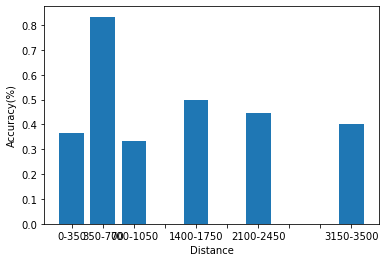

In [309]:
plt.bar(*zip(*grap_tuples))
plt.xlabel("Distance")
plt.ylabel("Accuracy(%)")
plt.xticks(np.arange(10), ['0-350', '350-700', '700-1050', "", "1400-1750","", "2100-2450", "", "", "3150-3500"])

In [130]:
import matplotlib.pyplot as plt
from math import log

In [134]:
zip(*loc_mention_graph)

In [ ]:
plt.bar(*zip(*loc_mention_graph))

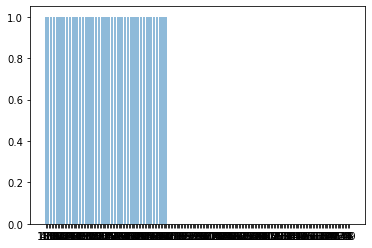

In [139]:
y_pos = np.arange(len(loc_mention_graph)) 
plt.bar(y_pos, [x[1] for x in loc_mention_graph], align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in loc_mention_graph])
plt.show()

In [136]:
plt.show()

In [125]:
len(match_abs_inv_recency[12] + [4]

[153,
 181,
 470,
 106,
 136,
 105,
 107,
 104,
 101,
 108,
 112,
 112,
 111,
 102,
 107,
 174,
 2356,
 106,
 243,
 666,
 1499,
 2705,
 133,
 145,
 337,
 3451,
 103,
 620,
 1502,
 135,
 1970,
 3371,
 123,
 102,
 117,
 76,
 110,
 157,
 2155,
 3235,
 3220,
 105,
 105,
 158,
 141,
 134,
 162,
 107,
 1596,
 99,
 110,
 101,
 104,
 160,
 97,
 249,
 98,
 142,
 104,
 3146,
 152,
 461,
 1040,
 1126,
 120,
 106,
 103,
 179,
 105,
 1929,
 1953,
 112,
 744,
 1169,
 126,
 2319,
 2400,
 3027,
 108,
 110,
 140,
 362,
 113,
 230,
 4]

In [118]:
match_loc_recency = {}
for k, prompt_distances in enumerate(match_abs_inv_recency):
    match_loc_recency[k+1] = sum(prompt_distances)/len(prompt_distances)

In [119]:
non_match_loc_recency = {}
for k, prompt_distances in enumerate(non_match_abs_inv_recency):
    non_match_loc_recency[k+1] = sum(prompt_distances)/len(prompt_distances)

In [121]:
for key in match_abs_inv_recency:
    print(len(key))

69
75
79
28
25
78
22
26
68
82
69
80
84
70
69
65
84
71
70
74
76
68
65


In [122]:
for key in non_match_abs_inv_recency:
    print(len(key))

141
135
131
182
185
132
188
184
142
128
141
130
126
140
141
145
126
139
140
136
134
142
145


In [44]:
for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        print(item)        
        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()
        
        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values
        f.close()
        
        break
        i = 0
    
        

Andersen_story2.txt


In [47]:
annotations[8]

array([6606, 'the emperor', 'the balcony', 'singular'], dtype=object)

# Character Mention - Location Mention Distance Analysis

In [310]:
match_distances = []
non_match_distances = []

for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        print(item)        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()
        
        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values
        f.close()
        
        i = 0
    
        for line in annotations:
            
            character = line[1]
            gold_answer = line[2]
            grammatical_number = line[3]

            gold_locations = gold_answer.split("/")
            
            for k in range(1, 24):
                
                y = line[0]
                x = y - 5120

                if x < 0:
                    text = story[0:y]

                else:
                    x = story[x:y].find(" ") + x
                    text = story[x:y]

                text = text.rstrip(", ;-\n")
                if text[-1] != ".":
                    text += "."
                text_list = text.split("\n\n")
                new_text_list = []                
                for element in text_list:
                    new_text_list.append(element.replace("\n", " "))
                text = "\n".join(new_text_list)
                prompt, context = create_prompt_clipped(k, text, character, grammatical_number, 1024) 
                pred_locs = m4_predictions[item][k-1]
                pred_tokenized = word_tokenize(pred_locs[i].lower())
                new_pred_tokens = [ token for token in pred_tokenized if token not in stop_words ]
                pred_wo_stop_words = " ".join(new_pred_tokens) 
                               
                for gold_location in gold_locations:
                    
                    gold_tokenized = word_tokenize(gold_location.lower())
                    new_gold_tokens = [ token for token in gold_tokenized if token not in stop_words ]
                    gold_wo_stop_words = " ".join(new_gold_tokens)
                    
                    loc_mention = context.rfind(gold_location)                    
                
                    if loc_mention != -1:
                        
                        char_mention_left = context[:loc_mention].rfind(character)                        
                        char_mention_right = context[loc_mention+len(gold_location):].find(character)
                        
                        if char_mention_left != -1:
                            distance_left = loc_mention - (char_mention_left + len(character))
                            
                        if char_mention_right != -1:
                            distance_right = char_mention_right
                            
                        if char_mention_left != -1 and char_mention_right != -1:
                            
                            if distance_left > distance_right:
                                distance = distance_right
                            else:
                                distance = distance_left
                                
                        elif char_mention_left != -1:
                            distance = distance_left
                        elif char_mention_right != -1:
                            distance = distance_right
                        else:
                            distance = -1
                        
                        if distance != -1:        
                            
                            if gold_wo_stop_words == pred_wo_stop_words:
                                match_distances.append(distance)

                            else:
                                non_match_distances.append(distance)
                   # else:
                   #     abs_inv_recency = -1

                    
            
            i += 1


Andersen_story2.txt
Andersen_story8.txt
Andersen_story11.txt
Andersen_story7.txt
Andersen_story17.txt
Andersen_story15.txt
Andersen_story9.txt
Andersen_story5.txt
Andersen_story1.txt
Andersen_story12.txt
Andersen_story16.txt
Andersen_story18.txt
Andersen_story3.txt
Andersen_story10.txt
Andersen_story13.txt


In [210]:
sum(match_distances)/len(match_distances)

312.51221001221

In [211]:
sum(non_match_distances)/len(non_match_distances)

536.8461710954143

In [311]:
charloc_mention_graph = []

for dist in match_distances:
    charloc_mention_graph.append((dist, 1))
    
for dist in non_match_distances:
    charloc_mention_graph.append((dist, 0))

In [218]:
max(non_match_distances)

4120

In [314]:
grap = defaultdict(list)
for tupl in charloc_mention_graph:
    for i in range(10):
        if 420*i<=tupl[0]<420*i+420:
            grap[i].append(tupl)
for i in range(10):
    if len(grap[i]) != 0:# and len(grap[i]) > 5:
        grap[i] = sum([tupl[1] == 1 for tupl in grap[i]]) / len(grap[i]) * 100
    else:
        grap[i] = 0
grap_tuples = [(key, grap[key]) for key in grap]

([<matplotlib.axis.XTick at 0x2b5f831a5fa0>,
 [Text(0, 0, '210'),
  Text(1, 0, '630'),
  Text(2, 0, '1050'),
  Text(3, 0, '1470'),
  Text(4, 0, '1890'),
  Text(5, 0, '2310'),
  Text(6, 0, '2730'),
  Text(7, 0, '3150'),
  Text(8, 0, '3570'),
  Text(9, 0, '3990')])

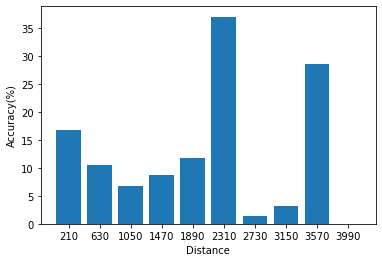

In [316]:
plt.bar(*zip(*grap_tuples))
plt.xlabel("Distance")
plt.ylabel("Accuracy(%)")
plt.xticks(np.arange(10), ['210', '630', '1050', "1470", "1890","2310", "2730", "3150", "3570", "3990"])

# Character Mention Recency

In [252]:
match_char_recency_dic = {}
non_match_char_recency_dic = {}

match_char_recency = [ [] for _ in range(1,24)]
non_match_char_recency = [ [] for _ in range(1,24)]

for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        print(item)

        match_char_recency_dic[item] = [ [] for _ in range(1,24)]
        non_match_char_recency_dic[item] = [ [] for _ in range(1,24)]
        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()
        
        f = open(os.path.join(path_annotations, item), 'r')
        annotations = pd.read_csv(f, sep="\t")
        annotations = annotations.values
        f.close()
        
        i = 0
    
        for line in annotations:
            
            character = line[1]
            gold_answer = line[2]
            grammatical_number = line[3]

            gold_locations = gold_answer.split("/")
            
            for k in range(1, 24):
                
                y = line[0]
                x = y - 5120

                if x < 0:
                    text = story[0:y]
                else:
                    x = story[x:y].find(" ") + x
                    text = story[x:y]

                text = text.rstrip(", ;-\n")
                if text[-1] != ".":
                    text += "."
                text_list = text.split("\n\n")
                new_text_list = []                
                for element in text_list:
                    new_text_list.append(element.replace("\n", " "))                    
                text = "\n".join(new_text_list)
                
                prompt, context = create_prompt_clipped(k, text, character, grammatical_number, 1024) 
                pred_locs = m4_predictions[item][k-1]
                pred_tokenized = word_tokenize(pred_locs[i].lower())
                new_pred_tokens = [ token for token in pred_tokenized if token not in stop_words ]
                pred_wo_stop_words = " ".join(new_pred_tokens) 
                                
                match = False
                char_mention = context.rfind(character)
                
                for num_loc, gold_location in enumerate(gold_locations):
                    
                    gold_tokenized = word_tokenize(gold_location.lower())
                    new_gold_tokens = [ token for token in gold_tokenized if token not in stop_words ]
                    gold_wo_stop_words = " ".join(new_gold_tokens)
                    
                    if gold_wo_stop_words == pred_wo_stop_words:
                        match = True
                            
                if char_mention != -1:
                    char_mention += len(character)
                    char_recency = len(context) - char_mention
                    if match:
                        match_char_recency_dic[item][k-1].append(char_recency)
                        match_char_recency[k-1].append(char_recency)
                    else:
                        non_match_char_recency_dic[item][k-1].append(char_recency)
                        non_match_char_recency[k-1].append(char_recency)
            i += 1

Andersen_story2.txt
Andersen_story8.txt
Andersen_story11.txt
Andersen_story7.txt
Andersen_story17.txt
Andersen_story15.txt
Andersen_story9.txt
Andersen_story5.txt
Andersen_story1.txt
Andersen_story12.txt
Andersen_story16.txt
Andersen_story18.txt
Andersen_story3.txt
Andersen_story10.txt
Andersen_story13.txt


In [253]:
prompt_no = 1
char_mention_graph = []

for dist in match_char_recency[prompt_no-1]:
    char_mention_graph.append((dist, 1))    

for dist in non_match_char_recency[prompt_no-1]:
    char_mention_graph.append((dist, 0))

In [247]:
char_recency

3041

In [246]:
len(prompt)

3075

In [245]:
char_mention

34

In [257]:
min(char_mention_graph)

(1, 0)

In [255]:
max(char_mention_graph)

(3633, 0)

In [319]:
grap = defaultdict(list)
for tupl in char_mention_graph:
    for i in range(4):
        if 80*i<=tupl[0]<80*i+80:
            grap[i].append(tupl)
for i in range(4):
    if len(grap[i]) > 6:
        grap[i] = sum([tupl[1] == 1 for tupl in grap[i]]) / len(grap[i]) * 100
    else:
        grap[i] = 0
grap_tuples = [(key, grap[key]) for key in grap]

([<matplotlib.axis.XTick at 0x2b5f832823d0>,
 [Text(0, 0, '0-79'),
  Text(1, 0, '80-159'),
  Text(2, 0, '160-239'),
  Text(3, 0, '240-299')])

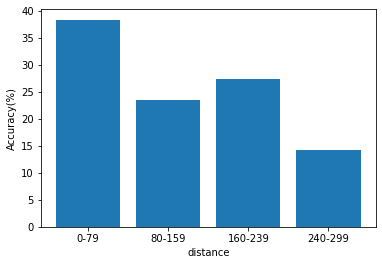

In [320]:
plt.bar(*zip(*grap_tuples))
plt.xlabel("distance")
plt.ylabel("Accuracy(%)")
plt.xticks(np.arange(4), ['0-79', '80-159', '160-239', "240-299"])

Text(0.5, 0, '')

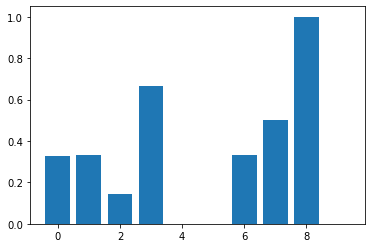

In [264]:
plt.bar(*zip(*grap_tuples))
plt.xlabel("")

# (Unnecessary) Other Way of Creating Prompts

In [ ]:
"""
def create_prompt(version, context, character, grammatical_number):
    
    if grammatical_number == 'singular':
        to_be = 'is'
    elif grammatical_number == 'plural':
        to_be = 'are'
    
    if version in [1, 2, 9, 10, 11, 12, 13, 20, 21, 22]:
        question = "Where " + to_be + " " + character + " in the end?"
    elif version in [4, 5, 7, 8, 15, 16, 18, 19]:
        question = "where " + character + " " + to_be + " in the end."
    elif version in [3, 14]:
        question = "where " + character + " " + to_be + " in the end?"
    elif version in [6, 17]:
        question = "where " + to_be + " " + character + " in the end?"
        
    if version == 1 or version == 12:
        intro = "Answer the question depending on the context."
    elif version == 2 or version == 13:
        intro = "What is the answer?"
    elif version == 3 or version == 14:
        intro = "Can you tell me "
    elif version == 4 or version == 15:
        intro = "Please tell me "
    elif version == 5 or version == 16:
        intro = "Tell me "
    elif version == 6 or version == 17:
        intro = "From the passage, "
    elif version == 7 or version == 18:
        intro = "I want to know "
    elif version == 8 or version == 19:
        intro = "I want to ask "
    elif version == 9 or version == 20:
        intro = "What is the answer to: "
    elif version == 10 or version == 21:
        intro = "Find the answer to: "
    elif version == 11 or version == 22:
        intro = "Answer: "
        
    if version in [1, 2]:
        tm = Template("""{{ intro }}
Context: {{context}};
Question: {{question}};
Answer: """)
        prompt = tm.render(intro=intro, context=context, question=question)
    elif version in [3, 4, 5, 6, 7, 8, 9, 10, 11]:
        tm = Template("{{context}} {{intro}}{{question}}")
        prompt = tm.render(intro=intro, context=context, question=question)
    if version in [12, 13]:
        tm = Template("""{{ intro }}
Context: {{context}};
Question: {{question}};
If you can't find the answer, please respond "unanswerable".
Answer: """)
        prompt = tm.render(intro=intro, context=context, question=question)
    elif version in [14, 15, 16, 17, 18, 19, 20, 21, 22]:
        tm = Template('{{context}} {{intro}}{{question}} If you can\'t find the answer, please respond "unanswerable"."')
        prompt = tm.render(intro=intro, context=context, question=question) 
        
    return prompt
"""

# (Unnecessary) Minibatching

In [24]:
all_tokens = {}

for item in dir_list_andersen:
    
    if item in dir_list_annotations:
        
        f = open(os.path.join(path_andersen, item), 'r') 
        story = f.read()
        f.close()
        
        all_tokens[item] = []
        
        y = 0
        
        len_story = len(story)
        
        while y+530 <= len_story:
            
            x = story[y+500:y+530].find(" ") + (y + 500)
            to_be_tokenized = story[y:x]
            inputs = tokenizer.encode(to_be_tokenized, return_tensors="pt")
            all_tokens[item].extend(inputs)
            y = x
            
        to_be_tokenized = story[y:]
        inputs = tokenizer.encode(to_be_tokenized, return_tensors="pt")
        all_tokens[item].extend(inputs)

In [49]:
minibatches = {}

for item in all_tokens:
    
    my_tensor = all_tokens[item][0]
    
    for i in range(len(all_tokens[item])-1):
        my_tensor = torch.cat((my_tensor, all_tokens[item][i+1]), dim=0)
    
    B = my_tensor.shape[0] // 512 + 1
    padding = torch.zeros(512 - (my_tensor.shape[0] % 512)) 
    my_tensor = torch.cat((my_tensor, padding), dim=0)
    minibatches[item] = my_tensor.reshape(B, 512)        

In [50]:
for item in minibatches:
    print(minibatches[item].shape)

torch.Size([5, 512])
torch.Size([9, 512])
torch.Size([2, 512])
torch.Size([6, 512])
torch.Size([10, 512])
torch.Size([6, 512])
torch.Size([2, 512])
torch.Size([9, 512])


# (Unnecessary) Rouge Calculation

In [14]:
rouge = Rouge()

In [40]:
recall = []
all_scores = []
for item in predictions:
    print(item)
    pred_locs = predictions[item]
    f = open(os.path.join(path_annotations, item), 'r')
    annotations = pd.read_csv(f, sep="\t")
    annotations = annotations.values #numpy array
    f.close()
    i = 0    
    for line in annotations:
        if line[2] == "0" or line[2] == 0:
            continue
        else:
            rouge_scores = rouge.get_scores(pred_locs[i], line[2])
            all_scores.append(rouge_scores)
            recall.append(rouge_scores[0]['rouge-1']['r'])
            i += 1

Andersen_story2.txt
Andersen_story8.txt
Andersen_story7.txt
Andersen_story9.txt
Andersen_story1.txt
Andersen_story3.txt
Andersen_story10.txt
Andersen_story4.txt


In [59]:
r1_recall = []
r1_precision = []
r1_f = []
r2_recall = []
r2_precision = []
r2_f = []
rl_recall = []
rl_precision = []
rl_f = []

for scores in all_scores:
    r1_recall.append(scores[0]["rouge-1"]["r"])
    r1_precision.append(scores[0]["rouge-1"]["p"])
    r1_f.append(scores[0]["rouge-1"]["f"])
    r2_recall.append(scores[0]["rouge-2"]["r"])
    r2_precision.append(scores[0]["rouge-2"]["p"])
    r2_f.append(scores[0]["rouge-2"]["f"])
    rl_recall.append(scores[0]["rouge-l"]["r"])
    rl_precision.append(scores[0]["rouge-l"]["p"])
    rl_f.append(scores[0]["rouge-l"]["f"])

In [60]:
r1_recall_avg = sum(r1_recall)/len(r1_recall)
r1_precision_avg = sum(r1_precision)/len(r1_precision)
r1_f_avg = sum(r1_f)/len(r1_f)
r2_recall_avg = sum(r2_recall)/len(r2_recall)
r2_precision_avg = sum(r2_precision)/len(r2_precision)
r2_f_avg = sum(r2_f)/len(r2_f)
rl_recall_avg = sum(rl_recall)/len(rl_recall)
rl_precision_avg = sum(rl_precision)/len(rl_precision)
rl_f_avg = sum(rl_f)/len(rl_f)

In [62]:
r1_recall_avg, r1_precision_avg, r1_f_avg

(0.4278079710144929, 0.33635012330664493, 0.3433857255959268)

In [63]:
r2_recall_avg, r2_precision_avg, r2_f_avg

(0.2423913043478261, 0.1527380228467185, 0.16400470156621647)

In [65]:
rl_recall_avg, rl_precision_avg, rl_f_avg

(0.4256340579710147, 0.33557372579111694, 0.3422415608362014)

In [ ]:
writer = pd.ExcelWriter("mymymymy.xlsx", engine='xlsxwriter')
my_dic = {"first": ["second", "third"], "fourth": ["""The Tree only came to himself when he was unloaded in a court-yard with
the other trees, and heard a man say, “That one is splendid! We don't
want the others.” Then two servants came in rich livery and carried the
Fir Tree into a large and splendid drawing-room. Portraits were hanging
on the walls, and near the white porcelain stove stood two large Chinese
vases with lions on the covers. There, too, were large easy-chairs,
silken sofas, large tables full of picture-books and full of toys, worth
hundreds and hundreds of crowns--at least the children said so. And the
Fir Tree was stuck upright in a cask that was filled with sand; but no
one could see that it was a cask, for green cloth was hung all round it,
and it stood on a large gaily-colored carpet. Oh! how the Tree quivered!
What was to happen? The servants, as well as the young ladies, decorated
it. On one branch there hung little nets cut out of colored paper, and
each net was filled with sugarplums; and among the other boughs gilded
apples and walnuts were suspended, looking as though they had grown
there, and little blue and white tapers were placed among the leaves.
Dolls that looked for all the world like men--the Tree had never beheld
such before--were seen among the foliage, and at the very top a
large star of gold tinsel was fixed. It was really splendid--beyond
description splendid.""", " love me"]}
df = pd.DataFrame(data=my_dic, index=["loo","lee"])
df = (df.T)
df.to_excel(writer, sheet_name="fifth")
worksheet = writer.sheets["fifth"]
workbook = writer.book
format = workbook.add_format({'text_wrap': True})
for idx, col in enumerate(df):
    series = df[col]
    max_len = 75
    worksheet.set_column(idx, idx, max_len, format)

writer.save()